# Assignment 2
## Anton Danielli, Rasmus Durgé
### Time spent : 12 hours , 12 hours

## Imports
First we import necessary packages for this report.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot
from sklearn import svm,datasets
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image  
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Next we download the data for the real estate from landvetter the past year

In [2]:
# Import data

df_realestate = pd.read_csv('data_assignment2.csv')

## Data cleaning
Removed several columns to make it easier when converting the remaining columns into arrays.

In [3]:
# Data cleaning

df_realestate = df_realestate.drop(columns = ['ID', 'Rooms', 'Land_size', 'Biarea', 'Age'])

## Creating regression line
Converted each remaining column and assigned them as X and y. Then the data is separated into a training part (80%) and testing part (20%), the training part is then fitted into a linear regression model.

In [4]:
# Implementing regression model

X = df_realestate.iloc[:, :-1].values
y = df_realestate.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Slope and intercept
After creating the model it is just a process of calling 'coef_' and 'intercept_' on regressor and printing the values.

In [5]:
# Calculate slope & intercept

kx = regressor.coef_
m = regressor.intercept_

print(f'Slope: {kx}')
print(f'Intercept: {m}')


Slope: [21810.15747254]
Intercept: 2096462.0947683384


## Predicting prices

With the model trained the function 'predict' can be used on the regressor and a predicted value is estimated for 100, 150 and 200 sqm.

In [6]:
# Predict sales price of house based on living area

prediction_100 = int(regressor.predict([[100]]))
prediction_150 = int(regressor.predict([[150]]))
prediction_200 = int(regressor.predict([[200]]))

print(f'A house of 100 sqm is predicted to sell for: {prediction_100} kr')
print(f'A house of 150 sqm is predicted to sell for: {prediction_150} kr')
print(f'A house of 200 sqm is predicted to sell for: {prediction_200} kr')

A house of 100 sqm is predicted to sell for: 4277477 kr
A house of 150 sqm is predicted to sell for: 5367985 kr
A house of 200 sqm is predicted to sell for: 6458493 kr


## Residuals plot
To create a residuals plot we used a package called 'yellowbrick' and visualized the training and test data in the plot below.

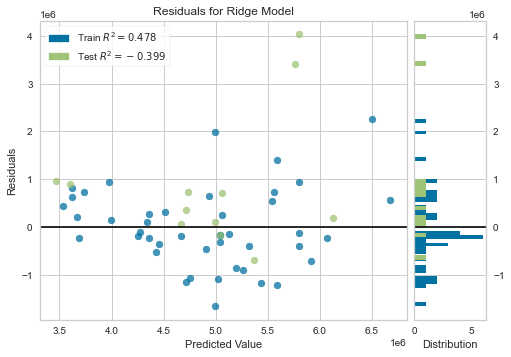

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [7]:
# Using yellowbrick package to visualize residuals

model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

## Improved performance
Additional data would greatly improve the models performance. Both having more data from earlier years and possibly using more factors that were available in the csv. Using data from the columns 'rooms' and 'land size' could help increase the models success in accurately predicting sell price. Also removing outlying data could be of great help to achieve an increase in performance.

## The iris data
Next we looked at a data set containing information about three different iris flowers. The data includes both name and properties of each specimen. Run the next two cells to see more information about how the iris were classified.

In [8]:
iris = datasets.load_iris()
#Run to see each name of the iris
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [9]:
#Run to see the properties of head iris flower
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Data separation
Next we separate the data into a training and a testing set. The training set is used for learning about what properties indicate which flower. This is subsequently tested on the test set to make predictions about an unknown iris. 

In [10]:
#Split data from label
X, y = datasets.load_iris(return_X_y=True)

#Split into training and test data, We use 75 % for training and 25 % for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 

## Decision tree as classifier
We now try to predict what species a certain iris belongs to. This is done via the training and testing data split. When we try to predict the species of an iris we use decision trees as a classifier. This algorithm consists of a tree with decision nodes and leaf nodes. The decision nodes has two or more branches and the tree dives further into the three as data is checked. The leaf nodes can be seen as a classification, when we reach a leaf node we have inspected the properties of an object and categorised it.

Next we plot a confusion matrix. The confusion matrix shows us how well our prediction match the test data. On the left side we see the actual values, i.e. the true species of the iris. On the adjecent axis below we can see the predicted value, this is the iris that our algoritm predicted based on the data values it recieved. The algoritm made this prediction based on a decision tree. We can also see that the algoritm yields a sucess rate of 97% which is quite good.

Accuracy:  0.9736842105263158


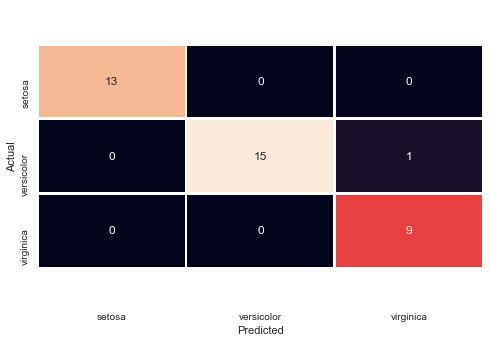

In [11]:
#Now use decisiontree as classifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)

#create predictions
y_pred = clf.predict(X_test)



print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
data = {'y_Actual' : y_test, 'y_Predicted' : y_pred}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
CM = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

ax =sns.heatmap(CM, annot=True,linewidths=2,cbar = False, xticklabels = iris.target_names,yticklabels = iris.target_names)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Next we can see the decision tree itself, every iris object runs through this tree and is classified accordingly.

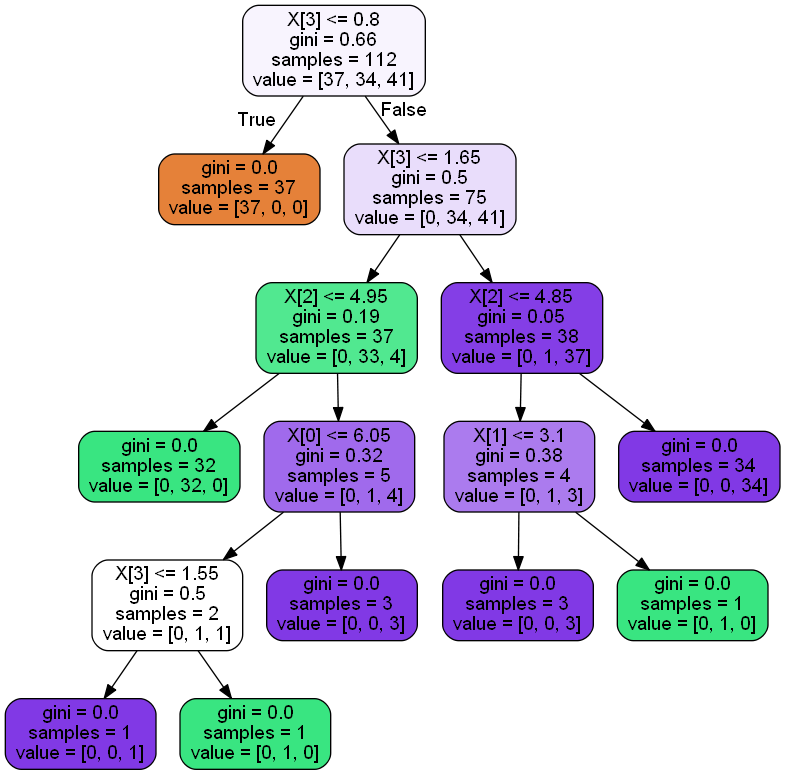

In [12]:
#Plot the decision tree
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, rounded = True, proportion = False, precision = 2, filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## KNN as classifier
Next we use a different algorithm for classification. This algorithm is called K nearest neighbour. It checks a data sample randomly and then classifies it according to its neighbour values. We first use uniform distance weights and loop through 1, 112 neigbours with an increment of 5.

In [13]:
#Now use KNN as classifier, using uniform
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

accuracy_score_uniform = []

#Use k values 1, .. 112
for k in range(1,112,5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy_score_uniform.append(metrics.accuracy_score(y_test,y_pred))

#Print the prediction accuracy of the uniform KNN for K = {1,22} with 5 step iterations
print(np.round(accuracy_score_uniform,3))


[1.    1.    0.974 0.974 0.974 0.974 0.974 0.974 0.974 0.974 0.921 0.921
 0.921 0.842 0.658 0.632 0.605 0.605 0.605 0.605 0.579 0.579 0.237]


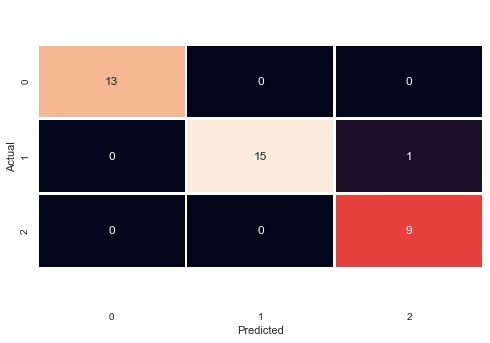

In [14]:
#Plot confusion matrix for k = 11
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)

#create predictions
y_pred = clf.predict(X_test)

#create confusion matrix
#confusion_matrix(y_test,y_pred)
#print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
data = {'y_Actual' : y_test, 'y_Predicted' : y_pred}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
CM = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

ax =sns.heatmap(CM, annot=True,linewidths=2,cbar = False,)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Next we use distance weights instead of uniform

In [15]:
accuracy_score_distance = []

#use k values 1, .. 112, now using distance
for k in range(1,112,5):
    knn = KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy_score_distance.append(metrics.accuracy_score(y_test,y_pred))
    
print(np.round(accuracy_score_distance,3))

[1.    1.    0.974 0.974 0.974 0.974 0.974 0.974 0.974 0.974 0.974 0.974
 0.974 0.974 0.974 0.974 0.974 0.974 0.974 0.974 0.974 0.974 0.974]


We check if there are any differences between uniform and distance weights.

In [16]:
#Is there any difference?
differences = []
for k in range(len(accuracy_score_distance)):
    differences.append(accuracy_score_uniform[k]-accuracy_score_distance[k])

#Take absolute value of the differences
abs =np.abs(differences)
#Print the difference
print(np.round(abs,3))
    

[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.053 0.053
 0.053 0.132 0.316 0.342 0.368 0.368 0.368 0.368 0.395 0.395 0.737]


## Difference between uniform and distance weighted KNN
We can see that initially uniform and distance weighted KNN has the same performance. But when K grows larger uniform starts to lose accuracy. This is because uniform does not take into account the distance from the sample we are trying to classify, hence every neighbour gets an equal part in the prediction. This makes is so that samples are influenced by other samples that can be very unlikely to be the same species. In distance weight we take the distance into account and connect each neighbour with a weight, this makes it so that samples that are located far from the iris we are trying to classify have less influence in the prediction. By doing this we can keep the same prediction accuracy when we increase the amount of neighbours.



## KNN vs decision trees summary
Both KNN and decision trees are supervised algorithms used for classification. Decision trees classify samples based on a set of boolean decisions. KNN classifies samples based on the surrounding neighbourhood of the sample. KNN is more widely used for clustering data, i.e. if we want to prescribe a medicine for a patient given some parameters about their condition. Decision trees are used for classification, for instance if we want to choose the proper action to perform given a certain scenario. The perfomance is KNN is linear, which means that if we have a high value of K the runtime will be very long. The performance is decision tree is the hight of the tree in the worst case, so decision trees have generally better performance than KNN. However decision trees can be prone to outliers while this is not the case with KNN. When we create confusion matrices we see that the results are identical. We chose to use a value of K = $\sqrt(n)\$ and in this case we had 112 samples and rounding that to nearest odd integer, we got 11

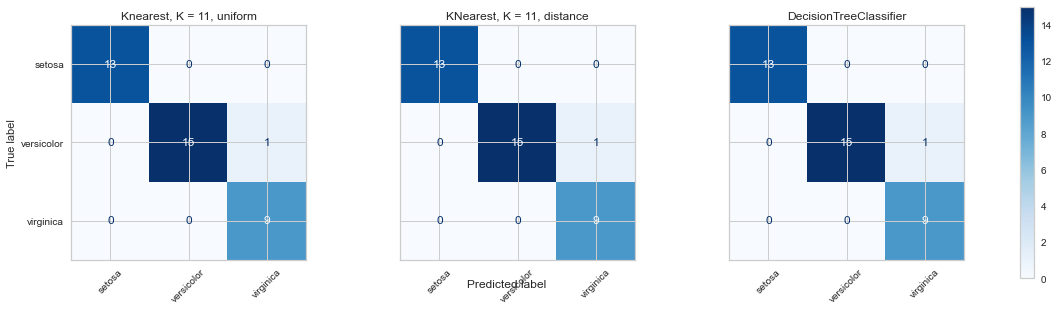

In [17]:
classifiers = {"Knearest, K = 11, uniform" : KNeighborsClassifier(n_neighbors=11),
               "KNearest, K = 11, distance" : KNeighborsClassifier(n_neighbors=11, weights='distance'),
               "DecisionTreeClassifier" : DecisionTreeClassifier(random_state = 1),
              }


f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=iris.target_names)
    disp.plot(ax=axes[i], xticks_rotation=45, cmap = 'Blues')
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')
    
f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

plt.grid(b=None)
plt.grid('off')
f.colorbar(disp.im_, ax=axes)
plt.show()


## Using separate tests
A model needs data on which to be trained as this is a principle of machine learning. To evaluate the model it is crucial to have data that it can be tested against, this is where the test data comes in. If 100% of the data where to be used for training it is impossible to evaluate the model’s effectiveness without new data. By using the same data for training and testing the model is making predictions based on data it already has and the testing becomes redundant.